In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [348]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [382]:
data_test=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/Assignments/3. Network Intrusion Detection System/NSL_Dataset/Test.txt",delimiter=",",names = col_names)

In [383]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [384]:
data_train=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/Assignments/3. Network Intrusion Detection System/NSL_Dataset/Train.txt",delimiter=",",names = col_names,header=None)

In [385]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [386]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [387]:
# Apply attack class mappings to the dataset
data_train['attack_class'] = data_train['attack'].apply(lambda x: mapping[x])
data_test['attack_class'] = data_test['attack'].apply(lambda x: mapping[x])

In [388]:
#Drop attack field from both train and test data
data_train.drop(['attack'], axis=1, inplace=True)
data_test.drop(['attack'], axis=1, inplace=True)

In [389]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,DoS
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,21,Normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,15,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11,Probe


In [390]:
# Descriptive statistics
data_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [393]:
# Attack Class Distribution
attack_class_freq_train = data_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = data_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


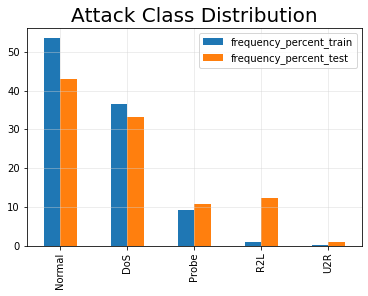

In [394]:
# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

Identifying relationships (between Y & numerical independent variables by comparing means)

In [395]:
data_train.groupby('attack_class').mean().T

attack_class,DoS,Normal,Probe,R2L,U2R
duration,0.006227,168.587396,2074.858185,633.417085,80.942308
src_bytes,1176.321162,13133.279331,385679.838367,307727.300503,906.230769
dst_bytes,169.201537,4329.685223,181074.911805,81822.026131,5141.961538
land,0.000392,0.000104,0.000000,0.000000,0.000000
wrong_fragment,0.062229,0.000000,0.000000,0.000000,0.000000
urgent,0.000000,0.000148,0.000000,0.003015,0.019231
hot,0.039889,0.230655,0.001630,8.334673,1.403846
num_failed_logins,0.000000,0.001381,0.000343,0.056281,0.019231
logged_in,0.020837,0.710646,0.007121,0.913568,0.884615
num_compromised,0.019226,0.507076,0.000601,0.077387,1.211538


#### Rename every attack label

In [396]:
data_train.loc[data_train.attack_class=='Normal','attack_cl']=0
data_train.loc[data_train.attack_class=='DoS','attack_cl']=1
data_train.loc[data_train.attack_class=='Probe','attack_cl']=2
data_train.loc[data_train.attack_class=='R2L','attack_cl']=3
data_train.loc[data_train.attack_class=='U2R','attack_cl']=4

In [397]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class,attack_cl
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,Normal,0.0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,Normal,0.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,DoS,1.0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,Normal,0.0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,Normal,0.0


In [398]:
data_test.loc[data_test.attack_class=='Normal','attack_cl']=0
data_test.loc[data_test.attack_class=='DoS','attack_cl']=1
data_test.loc[data_test.attack_class=='Probe','attack_cl']=2
data_test.loc[data_test.attack_class=='R2L','attack_cl']=3
data_test.loc[data_test.attack_class=='U2R','attack_cl']=4

In [399]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class,attack_cl
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,DoS,1.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,DoS,1.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,21,Normal,0.0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,15,Probe,2.0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11,Probe,2.0


#### Seperateing out Numerical and Categorical variables

In [400]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [401]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [402]:
numeric_var_names_train=[key for key in dict(data_train.dtypes) if dict(data_train.dtypes)[key] in ['float64', 'int64']]
cat_var_names_train=[key for key in dict(data_train.dtypes) if dict(data_train.dtypes)[key] in ['object']]

In [403]:
numeric_var_names_test=[key for key in dict(data_test.dtypes) if dict(data_test.dtypes)[key] in ['float64', 'int64']]
cat_var_names_test=[key for key in dict(data_test.dtypes) if dict(data_test.dtypes)[key] in ['object']]

In [404]:
cat_var_names_test

['protocol_type', 'service', 'flag', 'attack_class']

In [405]:
train_num=data_train[numeric_var_names_train] 
train_cat=data_train[cat_var_names_train]

In [406]:
train_cat.head()

,protocol_type,service,flag,attack_class
0,tcp,ftp_data,SF,Normal
1,udp,other,SF,Normal
2,tcp,private,S0,DoS
3,tcp,http,SF,Normal
4,tcp,http,SF,Normal


In [407]:
test_num=data_test[numeric_var_names_test] 
test_cat=data_test[cat_var_names_test]

In [408]:
test_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_cl
0,0,0,0,0,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,1.0
2,2,12983,0,0,0,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,21,0.0
3,0,20,0,0,0,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,15,2.0
4,1,0,15,0,0,0,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11,2.0


#### Data Audit Report

In [409]:
# Creating Data audit Report
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary_train=train_num.apply(lambda x: continuous_var_summary(x)).T

In [410]:
num_summary_train.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.144650,0.0,2.604515e+03,6.783500e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.743000,44.0,5.870331e+06,3.446079e+13,0.0,0.0,0.0,0.0,0.0,44.0,276.0,848.0,1480.0,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.0,4.021269e+06,1.617061e+13,0.0,0.0,0.0,0.0,0.0,0.0,516.0,3375.8,8314.0,25519.00,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.000198,0.0,1.408607e-02,1.984174e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.022687,0.0,2.535300e-01,6.427745e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.000000e+00


In [411]:
num_summary_train.to_csv('C:/Users/gaura/OneDrive/Desktop/num_summary_train.csv')

#### Handling Outliers

In [412]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num=train_num.apply(outlier_capping)
test_num=test_num.apply(outlier_capping)

#### Handling Missing Values

In [413]:
def missing_imputation(x):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) 
    else:
        x = x.fillna(x.mode())
    return x

In [414]:
train_num = train_num.apply(lambda x: missing_imputation(x))
test_num = test_num.apply(lambda x: missing_imputation(x))

In [415]:
train_num.isnull().sum()

duration                       0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

#### Dummy creation for categorical data

In [416]:
train_cat_dummies=pd.get_dummies(train_cat, drop_first=True)
test_cat_dummies=pd.get_dummies(test_cat, drop_first=True)

In [417]:
train_cat_dummies.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_class_Normal,attack_class_Probe,attack_class_R2L,attack_class_U2R
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


#### Merge Numerical and categorical data

In [418]:
train_new=pd.concat([train_num,train_cat_dummies], axis=1)
test_new=pd.concat([test_num,test_cat_dummies],axis=1)

In [419]:
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_class_Normal,attack_class_Probe,attack_class_R2L,attack_class_U2R
0,0.0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0.0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [420]:
import seaborn as sns
corrm=train_new.corr()

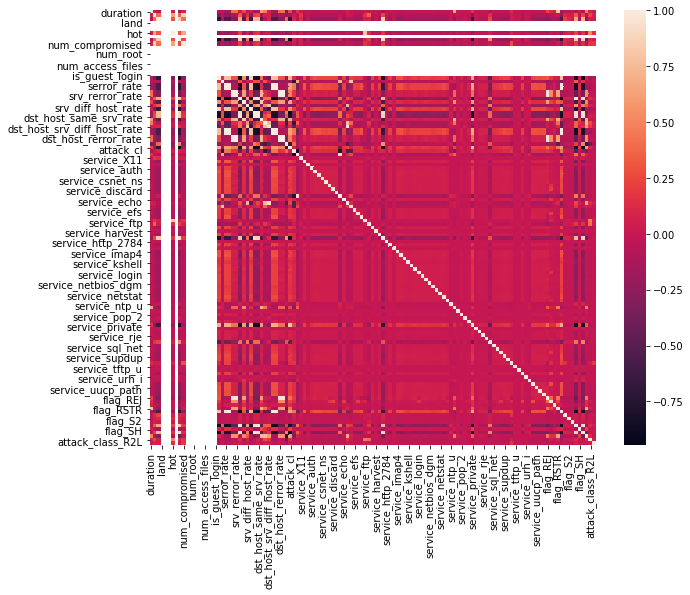

In [421]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(corrm.corr())

Dropping columns based on data audit report

    - Based on low variance (near zero variance)
    
    - High missings (>25% missings)
    
    - High correlations between two numerical variables

In [422]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

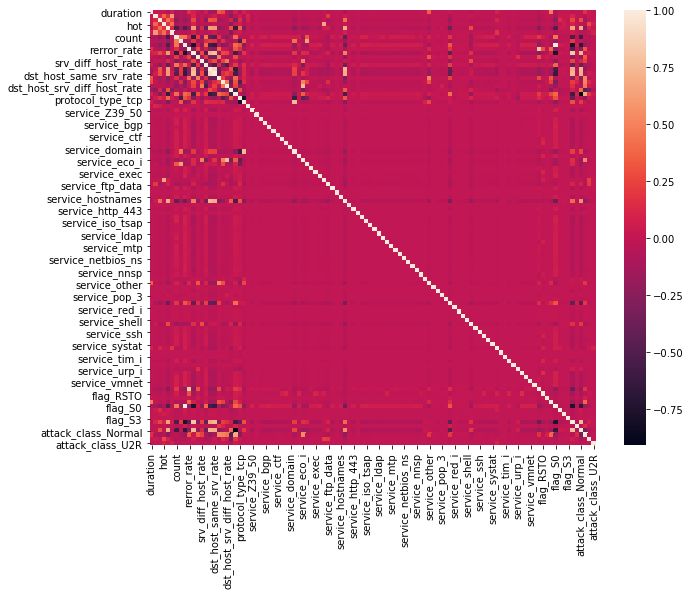

In [423]:
plt.figure(figsize = (10, 8))
sns.heatmap(train_new.corr())


#### Feature Selection

#### RFE - Recursive Feature Elimination

In [471]:
from sklearn.linear_model import LinearRegression
RFE_model = RFE(LinearRegression(), n_features_to_select=34)
# Generally use 1/3  no of variables "n_features_to_select"
RFE_model= RFE_model.fit(x, y)

In [472]:
x.columns

Index(['attack_class_Normal', 'attack_class_Probe', 'attack_class_R2L',
       'attack_class_U2R', 'count', 'diff_srv_rate', 'dst_bytes',
       'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate',
       ...
       'service_time', 'service_urh_i', 'service_urp_i', 'service_uucp',
       'service_uucp_path', 'service_vmnet', 'service_whois', 'src_bytes',
       'srv_count', 'srv_diff_host_rate'],
      dtype='object', length=105)

In [473]:
RFE_model.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False])

In [474]:
RFE_model.ranking_

array([ 1,  1,  1,  1, 66, 38, 68, 65, 29, 59, 60, 70,  1, 67,  4, 28,  1,
       10, 34, 71, 64,  1,  1,  1, 35, 63, 40, 49,  1,  1, 58, 51, 61, 44,
       41,  1, 31,  9,  5,  7, 13, 26,  1, 37,  1, 14,  1,  1,  1, 23, 18,
        8, 50, 27,  1,  1, 42, 19, 30,  1,  1,  1, 43, 25,  1, 20, 11, 24,
       32,  1, 12, 46,  1,  3, 16, 15, 52,  1,  1, 54, 22, 55,  1, 47,  1,
       21, 36,  1, 57, 33,  2, 48, 39,  1,  1,  6,  1,  1, 56, 45, 17, 53,
       72, 69, 62])

In [475]:
RFE_selected_Cols = x.columns[list(RFE_model.get_support())]

In [476]:
pd.Series(RFE_selected_Cols)

0             attack_class_Normal
1              attack_class_Probe
2                attack_class_R2L
3                attack_class_U2R
4     dst_host_srv_diff_host_rate
5                     flag_RSTOS0
6                         flag_S3
7                         flag_SF
8                         flag_SH
9               protocol_type_tcp
10              protocol_type_udp
11                    service_aol
12                service_discard
13               service_domain_u
14                  service_eco_i
15                  service_ecr_i
16                    service_efs
17                service_harvest
18              service_hostnames
19              service_http_8001
20                  service_imap4
21               service_iso_tsap
22                   service_ldap
23            service_netbios_dgm
24                service_netstat
25                service_pm_dump
26                  service_pop_2
27                  service_red_i
28                    service_rje
29            

#### SlectKBase

In [505]:
selectkbest = SelectKBest(f_oneway, k=34)
# Generally use 1/3  no of variables "k"
selectkbest = selectkbest.fit(x,y)

In [521]:
X = train_new[train_new.columns.difference(['attack_cl'])]
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['attack_cl'] )

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [522]:
selectkbest.get_support()

array([False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False])

In [523]:
selectkbest.scores_

array([1.81550754e+02, 5.32145415e+04, 8.62916978e+04, 9.00904420e+04,
       6.70487181e+04, 6.64813986e+04, 1.56655095e+04, 4.22016440e+05,
       6.09239790e+04, 4.05283190e+04, 3.93406108e+02, 1.36143180e+05,
       7.95775654e+04, 2.39640194e+03, 5.42522036e+04, 8.40913538e+04,
       8.98803953e+04, 8.08713943e+04, 1.63192532e+04, 8.88097453e+04,
       8.97817354e+04, 9.01028144e+04, 1.50470542e+02, 8.91922596e+04,
       5.89013615e+04, 9.66223607e+06, 5.33629619e+03, 8.51547850e+04,
       1.30523764e+04, 4.56355258e+04, 4.56233692e+04, 1.76260581e+03,
       1.54677420e+04, 9.00038871e+04, 8.68167648e+04, 9.02968927e+04,
       8.64492507e+04, 8.74210810e+04, 8.73253602e+04, 8.80822542e+04,
       8.80098628e+04, 8.81788769e+04, 8.81104239e+04, 8.79857467e+04,
       5.99321595e+04, 8.85301028e+04, 7.33169644e+04, 7.85003367e+04,
       8.83240274e+04, 8.83684308e+04, 8.33106991e+04, 8.33599733e+04,
       6.61556245e+04, 8.81909629e+04, 9.02968927e+04, 8.84249793e+04,
      

In [526]:
selectKbest_Cols = x.columns[list(selectkbest.get_support())]

In [527]:
pd.Series(selectKbest_Cols)

0        attack_class_U2R
1          dst_host_count
2      dst_host_srv_count
3             flag_RSTOS0
4                 flag_S1
5                 flag_S2
6                 flag_S3
7                 flag_SH
8               last_flag
9             service_X11
10            service_aol
11        service_harvest
12      service_http_2784
13      service_http_8001
14         service_kshell
15     service_netbios_ns
16    service_netbios_ssn
17        service_netstat
18           service_nntp
19          service_ntp_u
20        service_pm_dump
21          service_pop_2
22          service_pop_3
23        service_printer
24          service_red_i
25     service_remote_job
26            service_rje
27          service_shell
28        service_sql_net
29            service_ssh
30         service_sunrpc
31         service_tftp_u
32          service_tim_i
33          service_urh_i
dtype: object

In [518]:
x_new=['attack_class_U2R','dst_host_count','dst_host_srv_count','flag_RSTOS0','flag_S1','flag_S2','flag_S3','flag_SH','last_flag','service_X11','service_aol','service_harvest','service_http_2784','service_http_8001','service_kshell','service_netbios_ns','service_netbios_ssn','service_netstat','service_nntp','service_ntp_u','service_pm_dump','service_pop_2','service_pop_3','service_printer','service_red_i','service_remote_job','service_rje','service_shell','service_sql_net','service_ssh','service_sunrpc','service_tftp_u','service_tim_i','service_urh_i'
]

In [529]:
# capturing the important variables
KBest_features=X.columns[selectkbest.get_support()]
KBest_features

Index(['attack_class_U2R', 'dst_host_count', 'dst_host_srv_count',
       'flag_RSTOS0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SH', 'last_flag',
       'service_X11', 'service_aol', 'service_harvest', 'service_http_2784',
       'service_http_8001', 'service_kshell', 'service_netbios_ns',
       'service_netbios_ssn', 'service_netstat', 'service_nntp',
       'service_ntp_u', 'service_pm_dump', 'service_pop_2', 'service_pop_3',
       'service_printer', 'service_red_i', 'service_remote_job', 'service_rje',
       'service_shell', 'service_sql_net', 'service_ssh', 'service_sunrpc',
       'service_tftp_u', 'service_tim_i', 'service_urh_i'],
      dtype='object')

In [530]:
train=train_new
test=test_new

#### Model Building

In [566]:
features=['attack_class_U2R','dst_host_count','dst_host_srv_count','flag_RSTOS0','flag_S1','flag_S2','flag_S3','flag_SH','last_flag','service_X11','service_netbios_ns','service_netstat','service_pm_dump','service_printer','service_remote_job','service_sql_net','service_sunrpc'
]
X_train = train[features]
y_train = train['attack_cl']
X_test = test[features]
y_test = test['attack_cl']

#### K-Nearest Neighbors

In [567]:
from sklearn.neighbors import KNeighborsClassifier

In [568]:
k_neigh = KNeighborsClassifier(n_neighbors=3)
k_neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [569]:
y_pred=k_neigh.predict(X_test)
y_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [570]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6946859474804826

#### Decision Trees

In [571]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [572]:
clf_tree = DecisionTreeClassifier( max_depth = 5)
clf_tree=clf_tree.fit( X_train, y_train )

In [573]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6946859474804826

#### Fine Tuning the parameters

In [574]:
param_grid = {'max_depth': np.arange(3, 9),
             'max_features': np.arange(3,9)}

In [575]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'max_features': array([3, 4, 5, 6, 7, 8])})

In [576]:
tree.best_score_

0.9056067268463088

In [577]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=8)

In [578]:
tree.best_params_

{'max_depth': 8, 'max_features': 8}

In [579]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map


[('attack_class_U2R', 0.0),
 ('dst_host_count', 0.1673456408472048),
 ('dst_host_srv_count', 0.5924123732991144),
 ('flag_RSTOS0', 0.0),
 ('flag_S1', 0.0027661737766363865),
 ('flag_S2', 0.0),
 ('flag_S3', 0.0),
 ('flag_SH', 0.0011997257226255367),
 ('last_flag', 0.23627608635441885),
 ('service_X11', 0.0),
 ('service_netbios_ns', 0.0),
 ('service_netstat', 0.0),
 ('service_pm_dump', 0.0),
 ('service_printer', 0.0),
 ('service_remote_job', 0.0),
 ('service_sql_net', 0.0),
 ('service_sunrpc', 0.0)]

In [581]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
2,dst_host_srv_count,0.592412
8,last_flag,0.236276
1,dst_host_count,0.167346
4,flag_S1,0.002766
7,flag_SH,0.001200
11,service_netstat,0.000000
15,service_sql_net,0.000000
14,service_remote_job,0.000000
13,service_printer,0.000000
12,service_pm_dump,0.000000


In [582]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [583]:
tree_test_pred.sample( n = 10 )

,actual,predicted
3615,0.0,0.0
9856,1.0,1.0
2673,0.0,1.0
90,0.0,0.0
10929,3.0,2.0
16327,3.0,2.0
18155,1.0,1.0
19156,0.0,0.0
5795,1.0,1.0
13134,3.0,1.0


In [584]:
accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7203246983676366

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

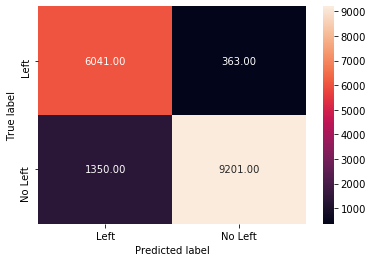

In [585]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Bagged Decision Trees

In [586]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [587]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9275003650667486


In [588]:
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [589]:
y_pred=model.predict(X_test)
y_pred


array([1., 0., 0., ..., 1., 0., 2.])

In [590]:
accuracy_score( y_test, y_pred )

0.6998757984386089

#### Random Forest

In [591]:
from sklearn.ensemble import RandomForestClassifier

In [592]:
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9279210944912218


In [593]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [594]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 0., ..., 1., 0., 2.])

In [595]:
accuracy_score( y_test, y_pred )

0.6979684173172462

#### AdaBoost

In [596]:
from sklearn.ensemble import AdaBoostClassifier

In [597]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8827289451194813


In [598]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30, random_state=7)

In [599]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 1.])

In [600]:
accuracy_score( y_test, y_pred )

0.6851490418736693

#### Stochastic Gradient Boosting

In [601]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)
y_pred

In [ ]:
accuracy_score( y_test, y_pred )